In [1]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract
import os

In [16]:
img_cv = cv2.imread(r"C:\InternProject\Selected\054.jpeg")

cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
type(img_cv)
print(img_cv)

[[[ 5  5 11]
  [ 6  6 12]
  [ 8  7 11]
  ...
  [ 8  7  9]
  [ 7  7  7]
  [ 7  7  7]]

 [[ 4  4 10]
  [ 5  5 11]
  [ 8  7 11]
  ...
  [ 6  5  7]
  [11 11 11]
  [11 11 11]]

 [[ 3  4  8]
  [ 4  5  9]
  [ 8  7 11]
  ...
  [ 7  6  8]
  [13 13 13]
  [13 13 13]]

 ...

 [[26 27 31]
  [28 29 33]
  [31 30 34]
  ...
  [ 8  7  9]
  [ 7  7  7]
  [ 7  7  7]]

 [[37 38 42]
  [32 33 37]
  [27 26 30]
  ...
  [ 8  7  9]
  [ 8  8  8]
  [ 8  8  8]]

 [[ 8  9 13]
  [ 4  5  9]
  [ 1  0  4]
  ...
  [10  9 11]
  [ 8  8  8]
  [ 9  9  9]]]


In [18]:
img_pl = PIL.Image.open(r"C:\InternProject\Selected\054.jpeg")

In [19]:
type(img_pl)

PIL.JpegImagePlugin.JpegImageFile

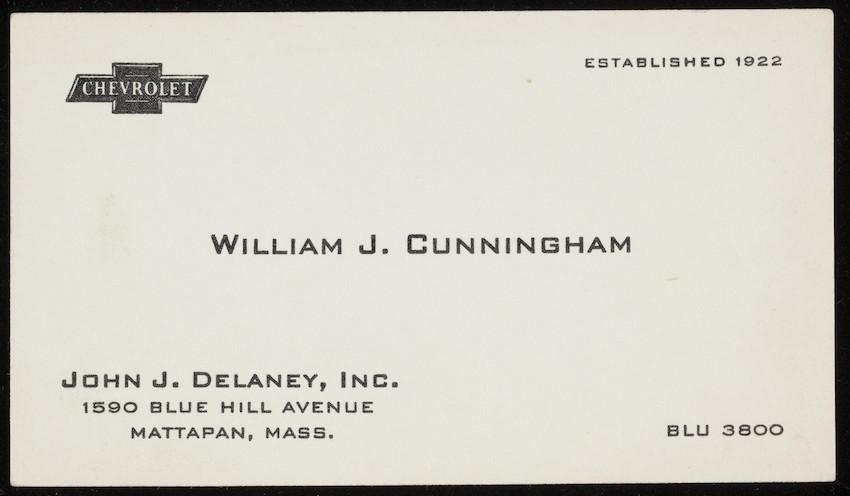

In [20]:
img_pl

### Text from Image

In [21]:
text_cv = pytesseract.image_to_string(img_cv)

In [22]:
print(text_cv)

ESTABLISHED 1922

WILLIAM J. CUNNINGHAM

JOHN J. DELANEY, ING.
1590 BLUE HILL AVENUE
MATTAPAN, MASS. BLU 3800




In [23]:
text_pl = pytesseract.image_to_string(img_pl)

In [24]:
print(text_pl)

ESTABLISHED 1922

WILLIAM J. CUNNINGHAM

JOHN J. DELANEY, ING.
1590 BLUE HILL AVENUE
MATTAPAN, MASS. BLU 3800




### Image to Data

In [25]:
data = pytesseract.image_to_data(img_cv)

In [26]:
#data.split('\n')
dataList = list(map(lambda x: x.split('\t'),data.split('\n')))
df = pd.DataFrame(dataList[1:],columns=dataList[0])

In [27]:
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,850,496,-1,
1,2,1,1,0,0,0,585,56,196,12,-1,
2,3,1,1,1,0,0,585,56,196,12,-1,
3,4,1,1,1,1,0,585,56,196,12,-1,
4,5,1,1,1,1,1,585,57,140,11,96.035889,ESTABLISHED
5,5,1,1,1,1,2,736,56,45,10,96.572784,1922
6,2,1,2,0,0,0,211,234,419,20,-1,
7,3,1,2,1,0,0,211,234,419,20,-1,
8,4,1,2,1,1,0,211,234,419,20,-1,
9,5,1,2,1,1,1,211,235,130,19,96.414688,WILLIAM


In [28]:
df.dropna(inplace=True) # drop the missing in rows
col_int = ['level','page_num','block_num','par_num','line_num','word_num','left','top','width','height','conf']
df[col_int] = df[col_int].astype(float)
df[col_int] = df[col_int].astype(int)

In [29]:
df.dtypes

level         int64
page_num      int64
block_num     int64
par_num       int64
line_num      int64
word_num      int64
left          int64
top           int64
width         int64
height        int64
conf          int64
text         object
dtype: object

In [30]:
image = img_cv.copy()
level = 'line'
for l,x,y,w,h,c,txt in df[['level','left','top','width','height','conf','text']].values:
    #print(l,x,y,w,h,c)
    if level == 'page':
        if l == 1:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,0),2)
        else:
            continue
            
    elif level == 'block':
        if l == 2:
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        else:
            continue
    
    elif level == 'para':
        if l == 3:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        else:
            continue
    
    elif level == 'line':
        if l == 4:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
        else:
            continue
            
    elif level == 'word':
        if l == 5:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(image,txt,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),2)
        else:
            continue
            
cv2.imshow("bounding box",image)
cv2.waitKey()
cv2.destroyAllWindows()